# IE 7300 Project Xinan Wang

In [10]:
# import the required packages

%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Postures.csv')
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78091,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78092,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78093,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


#### EDA

In [4]:
df = df.replace('?',0).astype(float)
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1.0,0.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5.0,14.0,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.543115,87.733364,61.216363,-62.126278,0.0,0.0,0.0,0.0,0.0,0.0
78091,5.0,14.0,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.130563,78.229847,33.078407,-45.249543,0.0,0.0,0.0,0.0,0.0,0.0
78092,5.0,14.0,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.835904,78.591554,32.327738,-46.166556,0.0,0.0,0.0,0.0,0.0,0.0
78093,5.0,14.0,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.221626,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,78095.0,2.983776,1.421152,1.000000,2.000000,3.000000,4.000000,5.000000
User,78095.0,7.959229,4.697754,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78095.0,50.346308,32.695886,-108.552738,29.295141,54.620245,72.488833,190.017835
Y0,78095.0,85.813150,40.203448,-98.233756,63.497746,86.526334,113.108673,169.175464
Z0,78095.0,-29.985096,34.361971,-126.770872,-56.356593,-30.864248,-1.419462,113.345119
X1,78095.0,49.595844,32.477961,-111.685241,28.755679,54.215714,71.763080,188.691997
Y1,78095.0,86.193751,40.452297,-96.142589,64.156450,87.543493,116.228881,170.209350
Z1,78095.0,-29.509579,34.764460,-166.006838,-57.360408,-30.185331,-0.368080,104.697852
X2,78095.0,48.612744,33.605155,-106.886524,25.173405,53.814592,71.561988,188.760168
Y2,78095.0,83.772387,41.022710,-100.789312,58.053733,86.459935,106.661720,168.186466


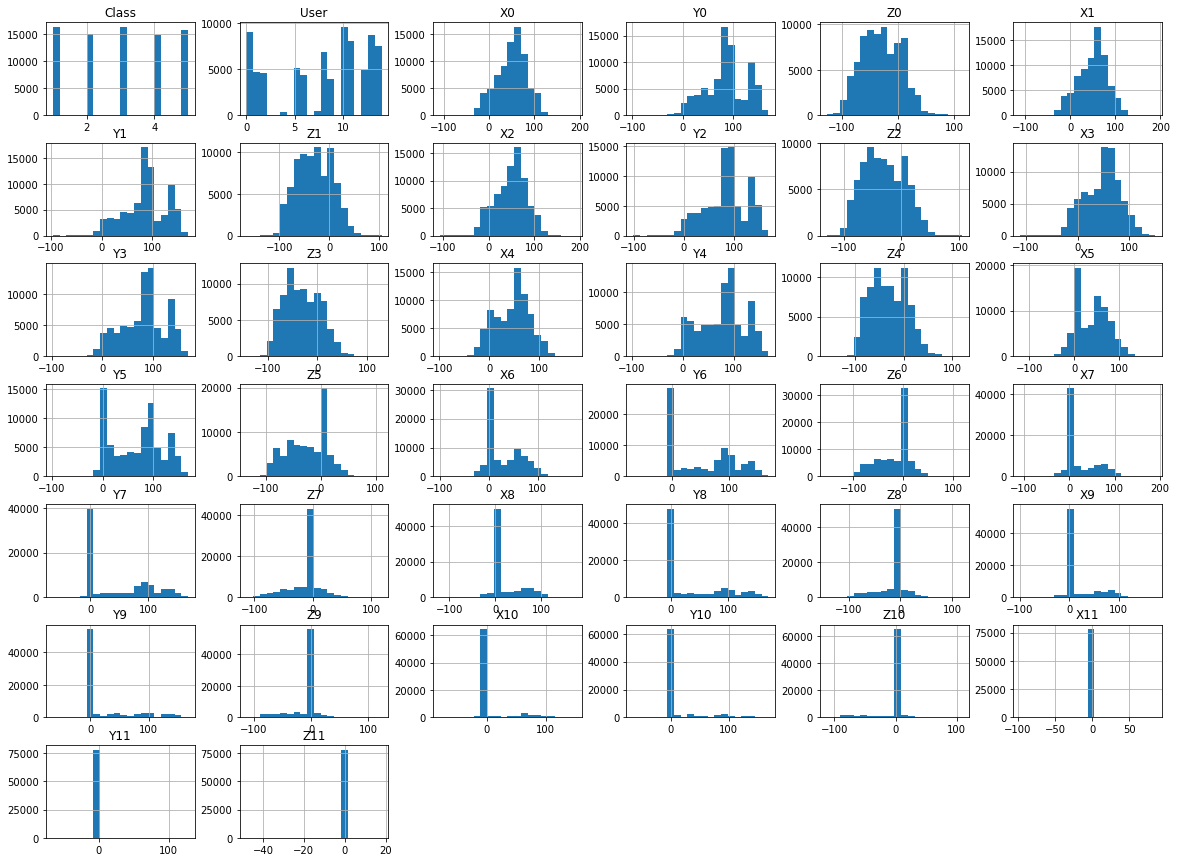

In [13]:
df.hist(figsize=(20,15),bins=20)
plt.show()

In [6]:
# Get the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78095 non-null  float64
 1   User    78095 non-null  float64
 2   X0      78095 non-null  float64
 3   Y0      78095 non-null  float64
 4   Z0      78095 non-null  float64
 5   X1      78095 non-null  float64
 6   Y1      78095 non-null  float64
 7   Z1      78095 non-null  float64
 8   X2      78095 non-null  float64
 9   Y2      78095 non-null  float64
 10  Z2      78095 non-null  float64
 11  X3      78095 non-null  float64
 12  Y3      78095 non-null  float64
 13  Z3      78095 non-null  float64
 14  X4      78095 non-null  float64
 15  Y4      78095 non-null  float64
 16  Z4      78095 non-null  float64
 17  X5      78095 non-null  float64
 18  Y5      78095 non-null  float64
 19  Z5      78095 non-null  float64
 20  X6      78095 non-null  float64
 21  Y6      78095 non-null  float64
 22

In [7]:
df['Class'].value_counts()

3.0    16344
1.0    16265
5.0    15733
2.0    14978
4.0    14775
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Y1'>

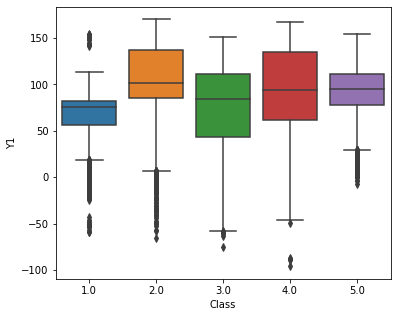

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Class',y='Y1')

<AxesSubplot:xlabel='Class', ylabel='Y6'>

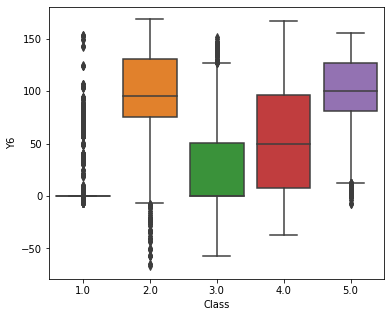

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Class',y='Y6')

<AxesSubplot:xlabel='Class', ylabel='X4'>

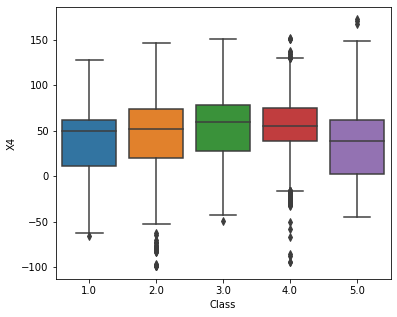

In [14]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Class',y='X4')

<AxesSubplot:xlabel='Class', ylabel='Z6'>

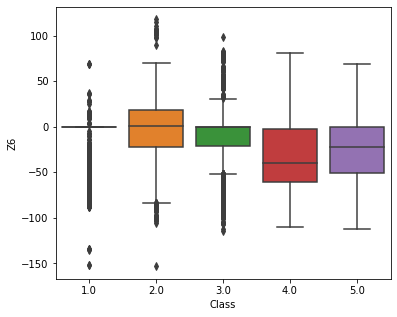

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Class',y='Z6')

In [7]:
# We need a function to plot the points

def pltHand(handPoints):
    plt.close('all')
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for i in range(11):
        pntx = f'X{i}'
        pnty = f'Y{i}'
        pntz = f'Z{i}'
        if(handPoints[pntx].values[0] == 0 or
            handPoints[pnty].values[0] == 0 or
            handPoints[pntz].values[0] == 0):
            n = 0;
        else:
            xlocation = handPoints[pntx]
            ylocation = handPoints[pnty]
            zlocation = handPoints[pntz]
            ax.scatter(xlocation, ylocation, zlocation, marker='v')
    crntClass = handPoints['Class'].values[0]
    if (crntClass == 1):
        title = 'Fist(with thumb out)'
    if(crntClass == 2):
        title = 'Stop(hand flat)'
    if (crntClass == 3):
        title = 'Point1(point with pointer finger)'
    if (crntClass == 4):
        title = 'Point2(point with pointer and middle fingers)'
    if (crntClass == 5):
        title = 'Grab(fingers curled as if to grab).'
    plt.title(title)

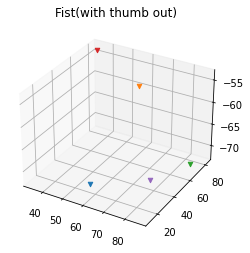

In [8]:
w = np.random.randint(df.shape[1], size=1)[0]
pltHand(df[w:w+1])

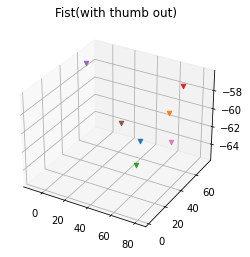

In [9]:
w = w = np.random.randint(df.shape[0], size=1)[0]
pltHand(df[w:w+1])

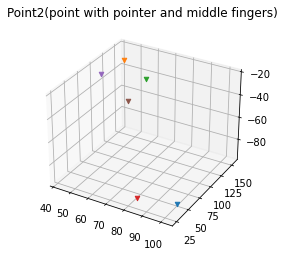

In [10]:
w = np.random.randint(df.shape[0], size=2)[0]
pltHand(df[w:w+1])

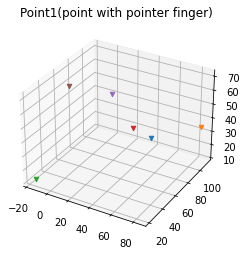

In [11]:
w = np.random.randint(df.shape[0], size=6)[0]
pltHand(df[w:w+1])

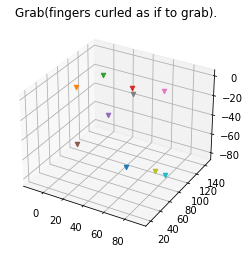

In [12]:
w = np.random.randint(df.shape[0], size=1)[0]
pltHand(df[w:w+1])

In [19]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1.0,0.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5.0,14.0,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.543115,87.733364,61.216363,-62.126278,0.0,0.0,0.0,0.0,0.0,0.0
78091,5.0,14.0,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.130563,78.229847,33.078407,-45.249543,0.0,0.0,0.0,0.0,0.0,0.0
78092,5.0,14.0,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.835904,78.591554,32.327738,-46.166556,0.0,0.0,0.0,0.0,0.0,0.0
78093,5.0,14.0,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.221626,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
78090    5.0
78091    5.0
78092    5.0
78093    5.0
78094    5.0
Name: Class, Length: 78095, dtype: float64

In [22]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2,random_state=42)

#### SVM

In [24]:
# Create SVM model

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder


def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


class MulticlassSVM(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])

        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)

        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [25]:
clf = MulticlassSVM(C=0.1, tol=0.01, max_iter=20, random_state=10, verbose=1)
clf.fit(Xtrain, Ytrain)
print("Accuracy of SVM is ",round(clf.score(Xtrain, Ytrain),4))

iter 1 violation 1.0
iter 2 violation 0.9633
iter 3 violation 0.7859
iter 4 violation 0.6094
iter 5 violation 0.4767
iter 6 violation 0.3844
iter 7 violation 0.3189
iter 8 violation 0.2682
iter 9 violation 0.2304
iter 10 violation 0.2016
iter 11 violation 0.1776
iter 12 violation 0.1581
iter 13 violation 0.1418
iter 14 violation 0.1284
iter 15 violation 0.117
iter 16 violation 0.107
iter 17 violation 0.0988
iter 18 violation 0.0918
iter 19 violation 0.0855
iter 20 violation 0.0804
Accuracy of SVM is  0.8361


In [26]:
Ypredict = clf.predict(Xtest)
Ypredict

array([2., 5., 3., ..., 4., 3., 1.])

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
print('----- Testing dataset validation -----')
print('')
print('The confusion matrix of testing dataset is:')
print(confusion_matrix(Ytest,Ypredict))
print('')
print("Accuracy of SVM for testing dataset is:",round(accuracy_score(Ytest,Ypredict),4))

----- Testing dataset validation -----

The confusion matrix of testing dataset is:
[[2953   11  273    9    1]
 [  27 2601   37   15  325]
 [ 324    1 2584  294   12]
 [  95   37  198 2530  148]
 [  35  408   58  260 2383]]

Accuracy of SVM for testing dataset is: 0.8356


In [40]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def train(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def getLoss(self):
        return self.loss;
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

In [41]:
LogRegression = MultiClassLogisticRegression()
LogRegression.train(Xtrain,Ytrain)

In [42]:
Ypred = LogRegression.predict_classes(Xtest)
Ypred

array([2., 5., 3., ..., 4., 3., 1.])

In [44]:
print('----- Testing dataset validation -----')
print('')
print('The confusion matrix of testing dataset is:')
print(confusion_matrix(Ytest,Ypred))
print('')
print("Accuracy of logistic regression for testing dataset is:",round(accuracy_score(Ytest,Ypred),4))

----- Testing dataset validation -----

The confusion matrix of testing dataset is:
[[2938   12  291    4    2]
 [  28 2645   34   26  272]
 [ 273    1 2586  338   17]
 [  76   69  245 2475  143]
 [  30  318   56  288 2452]]

Accuracy of logistic regression for testing dataset is: 0.8385


In [51]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [52]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [45]:
import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy


class AdaBoostClassifier(object):
    '''
    Parameters
    -----------
    base_estimator: object
        The base model from which the boosted ensemble is built.
    n_estimators: integer, optional(default=50)
        The maximum number of estimators
    learning_rate: float, optional(default=1)
    algorithm: {'SAMME','SAMME.R'}, optional(default='SAMME.R')
        SAMME.R uses predicted probabilities to update wights, while SAMME uses class error rate
    random_state: int or None, optional(default=None)
    Attributes
    -------------
    estimators_: list of base estimators
    estimator_weights_: array of floats
        Weights for each base_estimator
    estimator_errors_: array of floats
        Classification error for each estimator in the boosted ensemble.
    Reference:
    1. [multi-adaboost](https://web.stanford.edu/~hastie/Papers/samme.pdf)
    2. [scikit-learn:weight_boosting](https://github.com/scikit-learn/
    scikit-learn/blob/51a765a/sklearn/ensemble/weight_boosting.py#L289)
    '''

    def __init__(self, *args, **kwargs):
        if kwargs and args:
            raise ValueError(
                '''AdaBoostClassifier can only be called with keyword
                   arguments for the following keywords: base_estimator ,n_estimators,
                    learning_rate,algorithm,random_state''')
        allowed_keys = ['base_estimator', 'n_estimators', 'learning_rate', 'algorithm', 'random_state']
        keywords_used = kwargs.keys()
        for keyword in keywords_used:
            if keyword not in allowed_keys:
                raise ValueError(keyword + ":  Wrong keyword used --- check spelling")

        n_estimators = 50
        learning_rate = 1
        algorithm = 'SAMME.R'
        random_state = None

        if kwargs and not args:
            if 'base_estimator' in kwargs:
                base_estimator = kwargs.pop('base_estimator')
            else:
                raise ValueError('''base_estimator can not be None''')
            if 'n_estimators' in kwargs: n_estimators = kwargs.pop('n_estimators')
            if 'learning_rate' in kwargs: learning_rate = kwargs.pop('learning_rate')
            if 'algorithm' in kwargs: algorithm = kwargs.pop('algorithm')
            if 'random_state' in kwargs: random_state = kwargs.pop('random_state')

        self.base_estimator_ = base_estimator
        self.n_estimators_ = n_estimators
        self.learning_rate_ = learning_rate
        self.algorithm_ = algorithm
        self.random_state_ = random_state
        self.estimators_ = list()
        self.estimator_weights_ = np.zeros(self.n_estimators_)
        self.estimator_errors_ = np.ones(self.n_estimators_)


    def _samme_proba(self, estimator, n_classes, X):
        """Calculate algorithm 4, step 2, equation c) of Zhu et al [1].
        References
        ----------
        .. [1] J. Zhu, H. Zou, S. Rosset, T. Hastie, "Multi-class AdaBoost", 2009.
        """
        proba = estimator.predict_proba(X)

        # Displace zero probabilities so the log is defined.
        # Also fix negative elements which may occur with
        # negative sample weights.
        proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
        log_proba = np.log(proba)

        return (n_classes - 1) * (log_proba - (1. / n_classes)
                                  * log_proba.sum(axis=1)[:, np.newaxis])


    def fit(self, X, y):
        self.n_samples = X.shape[0]
        # There is hidden trouble for classes, here the classes will be sorted.
        # So in boost we have to ensure that the predict results have the same classes sort
        self.classes_ = np.array(sorted(list(set(y))))
        self.n_classes_ = len(self.classes_)
        for iboost in range(self.n_estimators_):
            if iboost == 0:
                sample_weight = np.ones(self.n_samples) / self.n_samples

            sample_weight, estimator_weight, estimator_error = self.boost(X, y, sample_weight)

            # early stop
            if estimator_error == None:
                break

            # append error and weight
            self.estimator_errors_[iboost] = estimator_error
            self.estimator_weights_[iboost] = estimator_weight

            if estimator_error <= 0:
                break

        return self


    def boost(self, X, y, sample_weight):
        if self.algorithm_ == 'SAMME':
            return self.discrete_boost(X, y, sample_weight)
        elif self.algorithm_ == 'SAMME.R':
            return self.real_boost(X, y, sample_weight)

    def real_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1.0 - 1 / self.n_classes_:
            return None, None, None

        y_predict_proba = estimator.predict_proba(X)
        # repalce zero
        y_predict_proba[y_predict_proba < np.finfo(y_predict_proba.dtype).eps] = np.finfo(y_predict_proba.dtype).eps

        y_codes = np.array([-1. / (self.n_classes_ - 1), 1.])
        y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])

        # for sample weight update
        intermediate_variable = (-1. * self.learning_rate_ * (((self.n_classes_ - 1) / self.n_classes_) *
                                                              inner1d(y_coding, np.log(
                                                                  y_predict_proba))))  #dot iterate for each row

        # update sample weight
        sample_weight *= np.exp(intermediate_variable)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, 1, estimator_error


    def discrete_boost(self, X, y, sample_weight):
        estimator = deepcopy(self.base_estimator_)
        if self.random_state_:
            estimator.set_params(random_state=1)

        estimator.fit(X, y, sample_weight=sample_weight)

        y_pred = estimator.predict(X)
        incorrect = y_pred != y
        estimator_error = np.dot(incorrect, sample_weight) / np.sum(sample_weight, axis=0)

        # if worse than random guess, stop boosting
        if estimator_error >= 1 - 1 / self.n_classes_:
            return None, None, None

        # update estimator_weight
        estimator_weight = self.learning_rate_ * np.log((1 - estimator_error) / estimator_error) + np.log(
            self.n_classes_ - 1)

        if estimator_weight <= 0:
            return None, None, None

        # update sample weight
        sample_weight *= np.exp(estimator_weight * incorrect)

        sample_weight_sum = np.sum(sample_weight, axis=0)
        if sample_weight_sum <= 0:
            return None, None, None

        # normalize sample weight
        sample_weight /= sample_weight_sum

        # append the estimator
        self.estimators_.append(estimator)

        return sample_weight, estimator_weight, estimator_error

    def predict(self, X):
        n_classes = self.n_classes_
        classes = self.classes_[:, np.newaxis]
        pred = None

        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            pred = sum(self._samme_proba(estimator, n_classes, X) for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            pred = sum((estimator.predict(X) == classes).T * w
                       for estimator, w in zip(self.estimators_,
                                               self.estimator_weights_))

        pred /= self.estimator_weights_.sum()
        if n_classes == 2:
            pred[:, 0] *= -1
            pred = pred.sum(axis=1)
            return self.classes_.take(pred > 0, axis=0)

        return self.classes_.take(np.argmax(pred, axis=1), axis=0)


    def predict_proba(self, X):
        if self.algorithm_ == 'SAMME.R':
            # The weights are all 1. for SAMME.R
            proba = sum(self._samme_proba(estimator, self.n_classes_, X)
                        for estimator in self.estimators_)
        else:  # self.algorithm == "SAMME"
            proba = sum(estimator.predict_proba(X) * w
                        for estimator, w in zip(self.estimators_,
                                                self.estimator_weights_))

        proba /= self.estimator_weights_.sum()
        proba = np.exp((1. / (n_classes - 1)) * proba)
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
# Fit the Adaboost model

Adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 50,
                                 learning_rate = 1, algorithm = 'SAMME.R',
                                 random_state = None)
Adaboost.fit(Xtrain,Ytrain)

/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctm

/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_91204/1786590862.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_coding = y_codes.take(self.classes_ == y[:, np.newaxis])
/var/folders/t3/ctm

In [49]:
Ypredict = Adaboost.predict(Xtest)
Ypredict

array([5., 5., 3., ..., 3., 1., 3.])

In [50]:
print('----- Testing dataset validation -----')
print('')
print('The confusion matrix of testing dataset is:')
print(confusion_matrix(Ytest,Ypredict))
print('')
print("Accuracy of logistic regression for testing dataset is:",round(accuracy_score(Ytest,Ypredict),4))

----- Testing dataset validation -----

The confusion matrix of testing dataset is:
[[2886    4  349    0    8]
 [  94 1304   35   60 1512]
 [  82   13 2868  204   48]
 [  21   78  712 1955  242]
 [  87  487   52  163 2355]]

Accuracy of logistic regression for testing dataset is: 0.7278
